<a href="https://colab.research.google.com/github/kiq-caique/inteligencia_artificial_UFV/blob/main/Machine_Learn_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATIVIDADE DE PROGRAMAÇÃO 2 - SVM

Primeiramente carregando o datasets prontos do sklearn, criando a variável 'iris' para receber todo o dataset.

variável 'x' fica responsável por coletar todas as linhas do data set + as colunas de ÍNDICE 2 e 3.

In [80]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris()


X = iris["data"][:,(2,3)] #petal length, petal width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)  # setosa | versicolor
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Treinando modelo SVC de margem rígida
svm_clf = SVC(kernel = 'linear', C=1e6)
svm_clf.fit(X,y)

## Visualizar o dataset como uma tabela (Lembrando q a ultima coluna foi tranformada em dataframa por isso o nomes foram substituidos por 0, 1 e 2)
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# iris_df




SVC(C=1000000.0, kernel='linear')

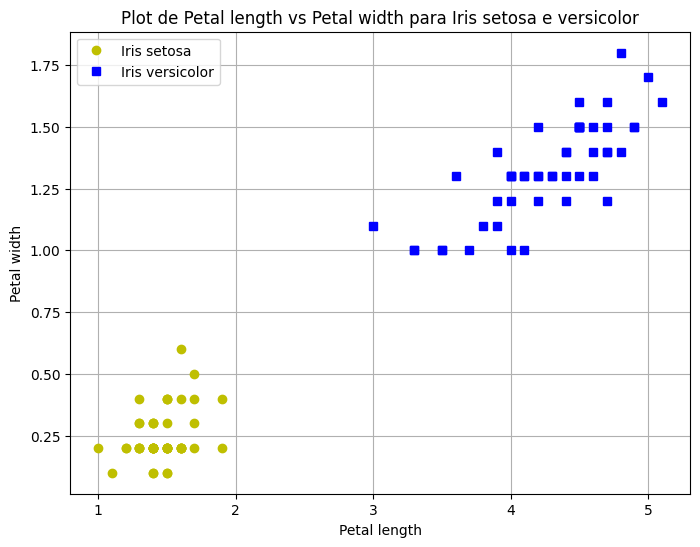

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], "yo", label="Iris setosa")  # Plotar setosa
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], "bs", label="Iris versicolor")  # Plotar versicolor
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Plot de Petal length vs Petal width para Iris setosa e versicolor")
plt.grid(True)
plt.show()

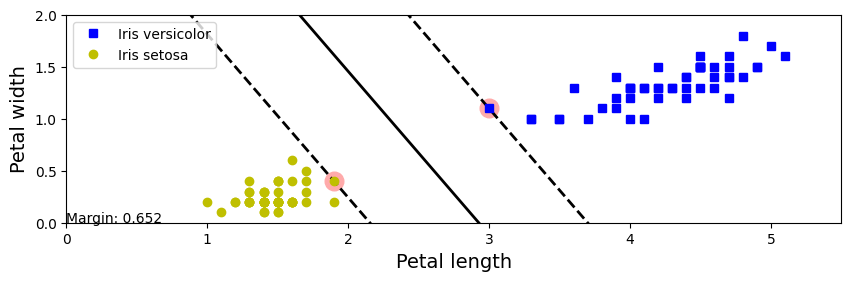

In [82]:
# Criando função para plotar as fronteiras de classificacao (vetor de suporte e hiperplano de suporte)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Na fronteira de decisao, w0*x0 + w1*x1 + b = 0
    # Hiperplano de decisao => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1] # para efeito visual
    margin_dist = 1/np.linalg.norm(w,2) # margem real do algoritmo

    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') #identifica os pontos do vetor de suporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #hiperplano de suporte
    plt.plot(x0, gutter_up, "k--", linewidth=2) # vetor de suporte +1
    plt.plot(x0, gutter_down, "k--", linewidth=2) # vetor de suporte -1
    plt.annotate('Margin: {}'.format(round(margin_dist,3)),(xmin,xmin)) #exibe o valor da margem de separação

# Criando retas de classificacao para o espaco de caracteristicas
# x0 = np.linspace(0, 5.5, 200)
# pred_1 = 5*x0 - 20
# pred_2 = x0 - 1.8
# pred_3 = 0.1 * x0 + 0.5

# Configurando a figura com subplots
fig, axes = plt.subplots(ncols=1, figsize=(10,2.7), sharey=True) # sharey -> compartilhar eixo y

# plt.sca(axes[0]) # subplot 0 - retas pred_1, pred_2 e pred_3
# plt.plot(x0, pred_1, "g--", linewidth=2) # reta verde tracejada
# plt.plot(x0, pred_2, "m-", linewidth=2) # reta magenta continua
# plt.plot(x0, pred_3, "r-", linewidth=2) # reta vermelha continua
# plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
# plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
# plt.xlabel("Petal length", fontsize=14)
# plt.ylabel("Petal width", fontsize=14)
# plt.legend(loc="upper left", fontsize=14)
# plt.axis([0, 5.5, 0, 2])

#subplot 1 - Classificador SVM linear
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])


plt.show()

# 1 - Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados. Adicione o ponto [3, 1.5] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.

Adicionando ponto [3, 1.5] de classe setosa nos dados do modelo

In [84]:
# Adicionando ponto [3, 1.5] de classe setosa nos dados
X = np.vstack([X, [3, 1.5]])
y = np.append(y, 0)

Treinando o modelo novamente com o novo dado inserido

In [85]:
svm_clf = SVC(kernel = 'linear', C=1e6)
svm_clf.fit(X,y)

SVC(C=1000000.0, kernel='linear')

Plotando o Classificador SVM linear novamente

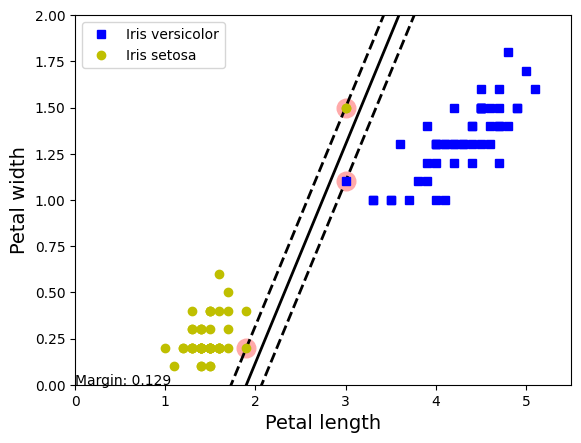

In [86]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])


plt.show()

Explicação: Ao adicionar o ponto [3, 1.5], a margem rígida da SVM pode ser afetada, pois o novo ponto pode se tornar um vetor de suporte, alterando a posição das margens.

# 2 - Para os dados utilizados no anterior, com a presença da nova amostra, ajuste um modelo de SVM de margens suaves, com os valores C = 1, 10, 100 e 1000. Comente o que acontece com as margens de cada um dos modelos. Qual se assemelha mais com o modelo de SVM de margens rígidas?

C = 1

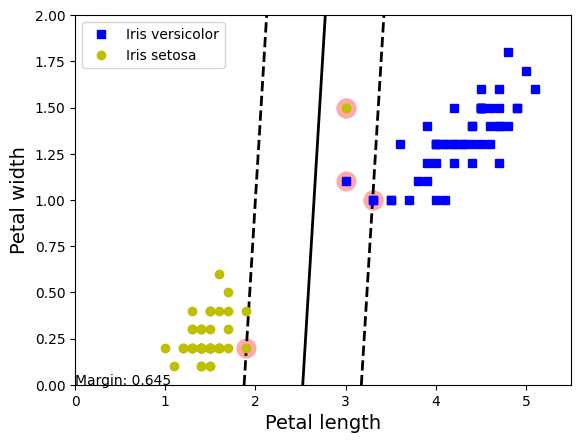

In [88]:
svm_clf = SVC(kernel = 'linear', C=1)
svm_clf.fit(X,y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])


plt.show()

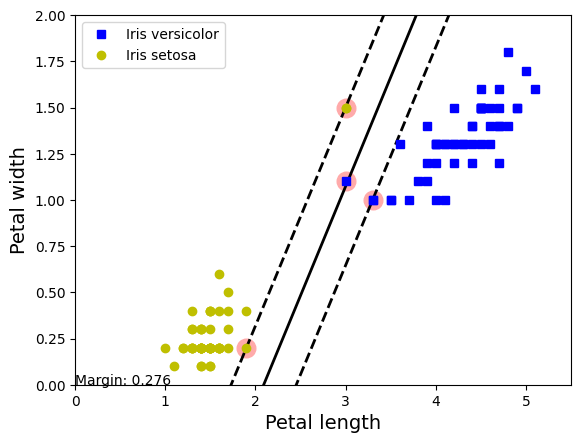

In [89]:
svm_clf = SVC(kernel = 'linear', C=10)
svm_clf.fit(X,y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])


plt.show()

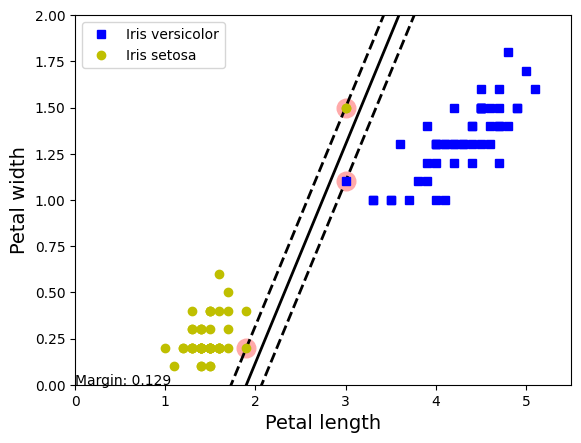

In [91]:
svm_clf = SVC(kernel = 'linear', C=100)
svm_clf.fit(X,y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])


plt.show()

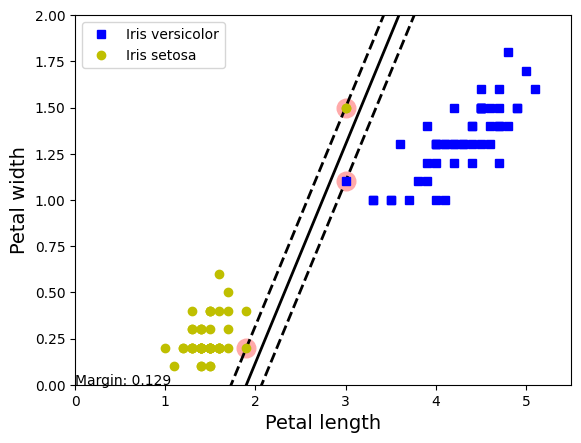

In [92]:
svm_clf = SVC(kernel = 'linear', C=1000)
svm_clf.fit(X,y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([0, 5.5, 0, 2])


plt.show()

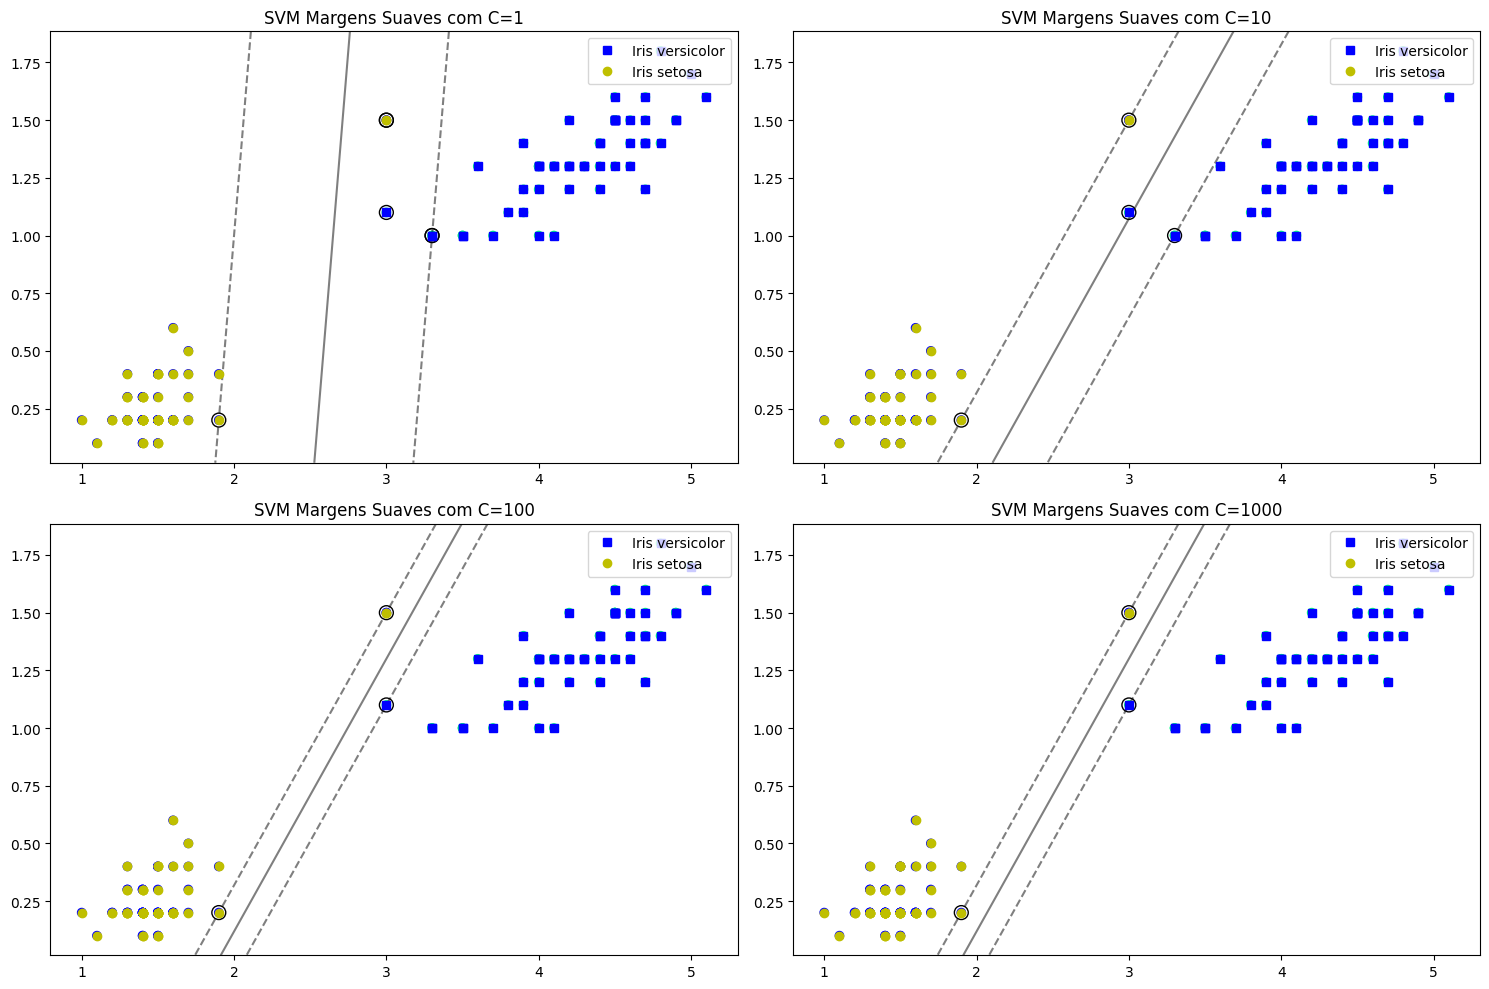

In [99]:
# Ajustando os modelos SVM de margens suaves para diferentes valores de C
Cs = [1, 10, 100, 1000]
svms_soft = [SVC(kernel='linear', C=C).fit(X, y) for C in Cs]

# Função para plotar margens suaves
def plot_svm_soft_margins(svms, X, y, Cs):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    for i, (svm, C) in enumerate(zip(svms, Cs)):
        ax = axes[i]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
        ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        ax.set_title(f'SVM Margens Suaves com C={C}')
        ax.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Chamando a função para plotar os modelos SVM de margens suaves
plot_svm_soft_margins(svms_soft, X, y, Cs)

* C = 1: As margens são mais largas, permitindo mais violações (erros de classificação)
* C = 10: As margens começam a se estreitar, permitindo menos violações.

* C = 100: As margens são ainda mais estreitas, com menos violações.
* C = 1000: As margens são muito rígidas, quase como uma SVM de margens rígidas.

O modelo com C = 1000 se assemelha mais ao modelo de SVM de margens rígidas.